In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [3]:
df = pd.read_csv('clean_dataset.csv')
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [4]:
df.duplicated().value_counts()

False    690
dtype: int64

In [5]:
df.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [6]:
df1 = df.copy()

In [7]:
df1.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [8]:
for col in df.columns:
    if df[col].dtypes == 'object':
        a=df.groupby('Approved')[col].count()
        print(a)
        print('\t')

Approved
0    383
1    307
Name: Industry, dtype: int64
	
Approved
0    383
1    307
Name: Ethnicity, dtype: int64
	
Approved
0    383
1    307
Name: Citizen, dtype: int64
	


In [9]:
# display the special character columns wise
import re
special_chars='[@_!#$%^&*()<>?/\|}{~:]' 

#to take care of nan-s
#df=df.fillna("")

for el in special_chars:
    temp_df1=df1["Citizen"].str.count(re.escape(el))
    df1[el]=np.where(temp_df1.gt(0), df1["Citizen"] + " (" + temp_df1.astype(int).astype(str) + ")", None)

df2=df1[list(special_chars)].agg(lambda x: list(x[~x.isna()]))
print('no.of special chars:',df2)
print('count of special characters',df2.sum())

no.of special chars: Empty DataFrame
Columns: [[, @, _, !, #, $, %, ^, &, *, (, ), <, >, ?, /, \, |, }, {, ~, :, ]]
Index: []

[0 rows x 23 columns]
count of special characters [    0.0
@    0.0
_    0.0
!    0.0
#    0.0
$    0.0
%    0.0
^    0.0
&    0.0
*    0.0
(    0.0
)    0.0
<    0.0
>    0.0
?    0.0
/    0.0
\    0.0
|    0.0
}    0.0
{    0.0
~    0.0
:    0.0
]    0.0
dtype: float64


In [10]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [11]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print('column name:',col)
        special = '[@_!#$%^&*()<>?/\|}{~:-]'
        print(df[col].astype('str').str.count(special).sum())
        df[col] = df[col].fillna('').astype(str).str.replace(special, '', regex=True).replace('', np.nan, regex=False)

column name: Industry
0
column name: Ethnicity
0
column name: Citizen
0


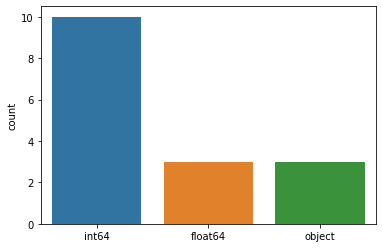

In [12]:
sns.countplot(df.dtypes.map(str))# here we can see that the count of int64 is more than the float64 and object
plt.show()

In [13]:
for col in df.columns:
    if df[col].dtypes != object:
        q1 = df[col].quantile(0.25)
        q2 = df[col].quantile(0.50)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('q1',q1)
        print('q2',q2)
        print('q3',q3)
        print('IQR',IQR)
        print('llp',llp)
        print('ulp',ulp)
        print('mean:',df[col].mean())
        print('median:',df[col].median())
        print('mode',df[col].mode()[0])
        print('skewness:',df[col].skew())
        print('kurtosis:',df[col].kurtosis())
        print('std',df[col].std())
        print('max',df[col].max())
        print('min',df[col].min())
        print('null_value count:',df[col].isnull().sum())
        print('\n')

column name Gender
q1 0.0
q2 1.0
q3 1.0
IQR 1.0
llp -1.5
ulp 2.5
mean: 0.6956521739130435
median: 1.0
mode 1
skewness: -0.8522739536938141
kurtosis: -1.2773399719578602
std 0.4604644536703794
max 1
min 0
null_value count: 0


column name Age
q1 22.67
q2 28.46
q3 37.707499999999996
IQR 15.037499999999994
llp 0.11375000000001023
ulp 60.26374999999999
mean: 31.514115942028983
median: 28.46
mode 28.46
skewness: 1.1673042222218972
kurtosis: 1.2035536514719607
std 11.860244756156716
max 80.25
min 13.75
null_value count: 0


column name Debt
q1 1.0
q2 2.75
q3 7.2075
IQR 6.2075
llp -8.31125
ulp 16.518749999999997
mean: 4.758724637681159
median: 2.75
mode 1.5
skewness: 1.4888131246649208
kurtosis: 2.274021886890654
std 4.978163248528541
max 28.0
min 0.0
null_value count: 0


column name Married
q1 1.0
q2 1.0
q3 1.0
IQR 0.0
llp 1.0
ulp 1.0
mean: 0.7608695652173914
median: 1.0
mode 1
skewness: -1.2258196957042626
kurtosis: -0.4988203496175454
std 0.4268619730839498
max 1
min 0
null_value count: 0

In [14]:
pip install autoviz

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'



  Created wheel for bokeh: filename=bokeh-2.3.3-py3-none-any.whl size=11342795 sha256=ec0a51741d78cbf0cfc5d558ab724b5cae172e8d5c4ada3694b96b4093620f75
  Stored in directory: c:\users\morga\appdata\local\pip\cache\wheels\8b\59\97\257265b741bab184e0cc8f5676309cb1fe6fbda22011bbb3ff
Successfully built bokeh


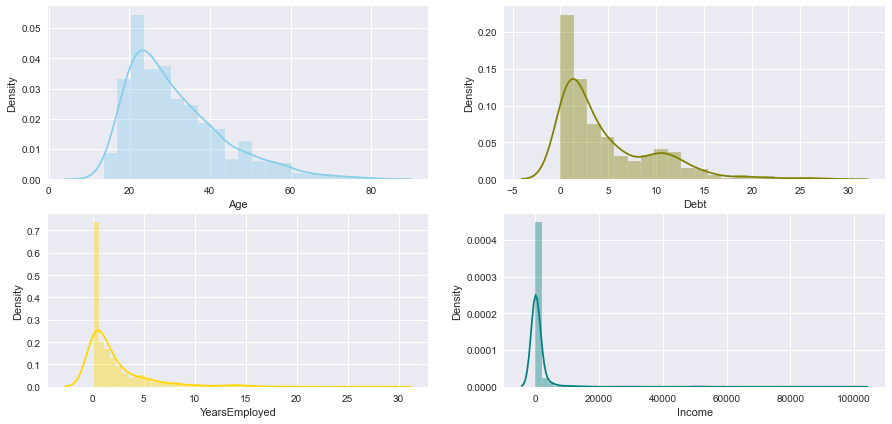

In [16]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False)
sns.distplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])
sns.distplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.distplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.distplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()

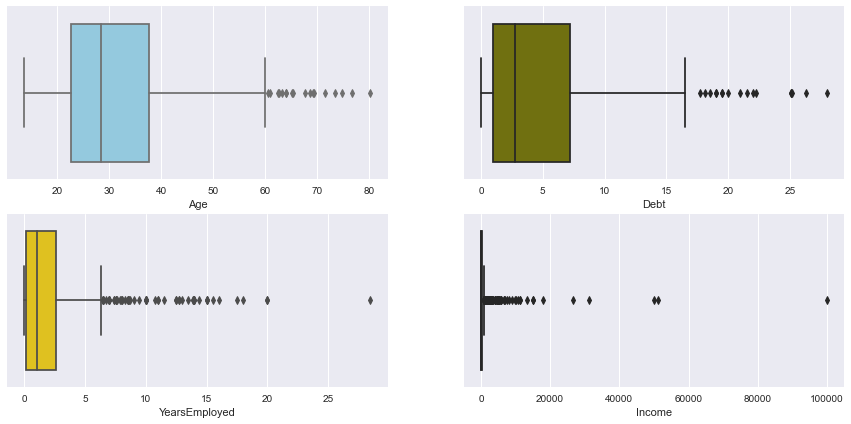

In [17]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False) # boxplot and distribution plots can be used to find outiers
sns.boxplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])# from boxplot and distplot we can find wheather the data is skewed
sns.boxplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.boxplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.boxplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes == object:
        df[col]= le.fit_transform(df[col])

In [19]:
x=df.drop('Approved',axis=1)
y=df['Approved']

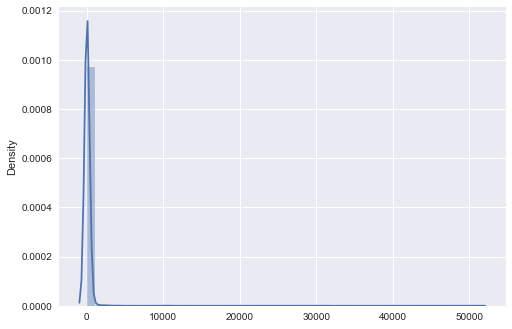

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
sns.distplot(x_test)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42,max_features=15)
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=15, random_state=42)

In [24]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [25]:
pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred_rf})

,actual_value,predicted_value
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0
...,...,...
357,0,0
215,1,0
629,0,0
390,0,0


In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        91
           1       0.88      0.85      0.86        82

    accuracy                           0.87       173
   macro avg       0.87      0.87      0.87       173
weighted avg       0.87      0.87      0.87       173

[[81 10]
 [12 70]]


In [27]:
rf_acc = accuracy_score(y_test,y_pred_rf)*100# it defines how much correctly the model is predicting the actual value
rf_acc

87.28323699421965

In [28]:
result = rf.predict(np.array([[1,22,5.6,1,1,5,3,4.5,0,2,0,1,203,450,1]]))
result

array([1], dtype=int64)